# Project 5
## Wrangle and Analyze Data

We are wrangling, analyzing, and visualizing the tweet archive of the Twitter acount, @dog_rates aka WeRateDogs.
> 'WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.'

Softwares Used
The following packages (libraries) need to be installed. You can install these packages via conda or pip. Please revisit our Anaconda tutorial earlier in the Nanodegree program for package installation instructions.

- pandas
- NumPy
- requests
- tweepy
- json

### Project Motivation
#### Context
Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

#### Key Points 
- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### Project Details
- Data Wrangling:
    - Gathering data
    - Assessing Data
    - Cleaning Data
- Storing, analyzing, and visualizing your wrangled data
- Reporting on 
    - your wrangling efforts
    - data analyses and visualizations

## Gathering Data
3 Sources:
- .CSV containing preliminary data from WeRateDogs tweets
- .TSV containing images; neural network analysis of dog breeds
- Twitter API with additional data

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt

In [2]:
#read in archive
archive = pd.read_csv("twitter-archive-enhanced.csv")

archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
#read in images and read
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open("image_predictions.tsv", mode="wb") as file:
    file.write(response.content)

In [4]:
img = pd.read_csv("image_predictions.tsv", sep="\t")

img.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


We are now going to access the Twitter API data (you need to set up a Twitter developer account and get the following:
> - consumer_key
> - consumer_secret
> - access_token
> - access_secret

wait_on_rate_limit and wait_on_rate_limit_notify are set to TRUE because:
- Twitter puts limits on number of requests
- we're gathering data from thousands of tweets

In [5]:
#read in Twitter API

"""# SUBSTITUTE X YOUR INFO FOUND ON TWITTER DEVELOPER PAGE
consumer_key = 'X'
consumer_secret = 'X'
access_token = 'X'
access_secret = 'X'"""

auth = tweepy.OAuthHandler('EUJE983fnuWijNkixWLCzY0HQ', 'PpTmbgXNvmiBsPHO9hKIDBRj03099F6ePvBPSS9yunt2zHRa6q')
auth.set_access_token('2916046549-R1BC1EtrvzcxTt3R5JWAOvte9w7zWVFDc4qaD3c', 'METfYLt99l8QASyuEy3qQeqA90Y2dYsWe1Q1ieOjwmYm0')
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Tweet information should be accessed through 'get_status'
- the Tweet JSON data = 'tweet_json.txt' file using 'dump()' (from json module)
- this will repear for every tweet_id in the 'archive' df

In [6]:
# the below code will WRITE tweet data to a tweet_json.txt file
with open("tweet_json.txt", mode="w") as file:
    for tweet_id in archive.tweet_id.astype(str):
        try:
            print("Fetching status for tweet_id", tweet_id)
            tweet = api.get_status(tweet_id, tweet_mode="extended") #"extended" avoids truncation
            json.dump(tweet._json, file)
            file.write("\n")    # so that each tweet json data is in a different line
        except:
            print("Failed")

Fetching status for tweet_id 892420643555336193
Fetching status for tweet_id 892177421306343426
Fetching status for tweet_id 891815181378084864
Fetching status for tweet_id 891689557279858688
Fetching status for tweet_id 891327558926688256
Fetching status for tweet_id 891087950875897856
Fetching status for tweet_id 890971913173991426
Fetching status for tweet_id 890729181411237888
Fetching status for tweet_id 890609185150312448
Fetching status for tweet_id 890240255349198849
Fetching status for tweet_id 890006608113172480
Fetching status for tweet_id 889880896479866881
Fetching status for tweet_id 889665388333682689
Fetching status for tweet_id 889638837579907072
Fetching status for tweet_id 889531135344209921
Fetching status for tweet_id 889278841981685760
Fetching status for tweet_id 888917238123831296
Fetching status for tweet_id 888804989199671297
Fetching status for tweet_id 888554962724278272
Fetching status for tweet_id 888202515573088257
Failed
Fetching status for tweet_id 8880

Fetching status for tweet_id 859074603037188101
Fetching status for tweet_id 858860390427611136
Fetching status for tweet_id 858843525470990336
Fetching status for tweet_id 858471635011153920
Fetching status for tweet_id 858107933456039936
Fetching status for tweet_id 857989990357356544
Fetching status for tweet_id 857746408056729600
Fetching status for tweet_id 857393404942143489
Fetching status for tweet_id 857263160327368704
Fetching status for tweet_id 857214891891077121
Fetching status for tweet_id 857062103051644929
Fetching status for tweet_id 857029823797047296
Fetching status for tweet_id 856602993587888130
Failed
Fetching status for tweet_id 856543823941562368
Fetching status for tweet_id 856526610513747968
Fetching status for tweet_id 856330835276025856
Fetching status for tweet_id 856288084350160898
Fetching status for tweet_id 856282028240666624
Fetching status for tweet_id 855862651834028034
Fetching status for tweet_id 855860136149123072
Fetching status for tweet_id 8558

Fetching status for tweet_id 832215909146226688
Fetching status for tweet_id 832215726631055365
Fetching status for tweet_id 832088576586297345
Fetching status for tweet_id 832040443403784192
Fetching status for tweet_id 832032802820481025
Fetching status for tweet_id 831939777352105988
Fetching status for tweet_id 831926988323639298
Fetching status for tweet_id 831911600680497154
Fetching status for tweet_id 831670449226514432
Fetching status for tweet_id 831650051525054464
Fetching status for tweet_id 831552930092285952
Fetching status for tweet_id 831322785565769729
Fetching status for tweet_id 831315979191906304
Fetching status for tweet_id 831309418084069378
Fetching status for tweet_id 831262627380748289
Fetching status for tweet_id 830956169170665475
Fetching status for tweet_id 830583320585068544
Fetching status for tweet_id 830173239259324417
Fetching status for tweet_id 830097400375152640
Fetching status for tweet_id 829878982036299777
Fetching status for tweet_id 82986139616

Fetching status for tweet_id 811985624773361665
Fetching status for tweet_id 811744202451197953
Fetching status for tweet_id 811647686436880384
Fetching status for tweet_id 811627233043480576
Fetching status for tweet_id 811386762094317568
Fetching status for tweet_id 810984652412424192
Fetching status for tweet_id 810896069567610880
Fetching status for tweet_id 810657578271330305
Fetching status for tweet_id 810284430598270976
Fetching status for tweet_id 810254108431155201
Fetching status for tweet_id 809920764300447744
Fetching status for tweet_id 809808892968534016
Fetching status for tweet_id 809448704142938112
Fetching status for tweet_id 809220051211603969
Fetching status for tweet_id 809084759137812480
Fetching status for tweet_id 808838249661788160
Fetching status for tweet_id 808733504066486276
Fetching status for tweet_id 808501579447930884
Fetching status for tweet_id 808344865868283904
Fetching status for tweet_id 808134635716833280
Fetching status for tweet_id 80810646058

Fetching status for tweet_id 788552643979468800
Fetching status for tweet_id 788412144018661376
Fetching status for tweet_id 788178268662984705
Fetching status for tweet_id 788150585577050112
Fetching status for tweet_id 788070120937619456
Fetching status for tweet_id 788039637453406209
Fetching status for tweet_id 787810552592695296
Fetching status for tweet_id 787717603741622272
Fetching status for tweet_id 787397959788929025
Fetching status for tweet_id 787322443945877504
Fetching status for tweet_id 787111942498508800
Fetching status for tweet_id 786963064373534720
Fetching status for tweet_id 786729988674449408
Fetching status for tweet_id 786709082849828864
Fetching status for tweet_id 786664955043049472
Fetching status for tweet_id 786595970293370880
Fetching status for tweet_id 786363235746385920
Fetching status for tweet_id 786286427768250368
Fetching status for tweet_id 786233965241827333
Fetching status for tweet_id 786051337297522688
Fetching status for tweet_id 78603696750

Fetching status for tweet_id 765371061932261376
Fetching status for tweet_id 765222098633691136
Fetching status for tweet_id 764857477905154048
Fetching status for tweet_id 764259802650378240
Fetching status for tweet_id 763956972077010945
Fetching status for tweet_id 763837565564780549
Fetching status for tweet_id 763183847194451968
Fetching status for tweet_id 763167063695355904
Fetching status for tweet_id 763103485927849985
Fetching status for tweet_id 762699858130116608
Fetching status for tweet_id 762471784394268675
Fetching status for tweet_id 762464539388485633
Fetching status for tweet_id 762316489655476224
Fetching status for tweet_id 762035686371364864
Fetching status for tweet_id 761976711479193600
Fetching status for tweet_id 761750502866649088
Fetching status for tweet_id 761745352076779520
Fetching status for tweet_id 761672994376806400
Fetching status for tweet_id 761599872357261312
Fetching status for tweet_id 761371037149827077
Fetching status for tweet_id 76133401883

Rate limit reached. Sleeping for: 675


Fetching status for tweet_id 758474966123810816
Fetching status for tweet_id 758467244762497024
Fetching status for tweet_id 758405701903519748
Fetching status for tweet_id 758355060040593408
Fetching status for tweet_id 758099635764359168
Fetching status for tweet_id 758041019896193024
Fetching status for tweet_id 757741869644341248
Fetching status for tweet_id 757729163776290825
Fetching status for tweet_id 757725642876129280
Fetching status for tweet_id 757611664640446465
Fetching status for tweet_id 757597904299253760
Fetching status for tweet_id 757596066325864448
Fetching status for tweet_id 757400162377592832
Fetching status for tweet_id 757393109802180609
Fetching status for tweet_id 757354760399941633
Fetching status for tweet_id 756998049151549440
Fetching status for tweet_id 756939218950160384
Fetching status for tweet_id 756651752796094464
Fetching status for tweet_id 756526248105566208
Fetching status for tweet_id 756303284449767430
Fetching status for tweet_id 75628853403

Fetching status for tweet_id 739979191639244800
Fetching status for tweet_id 739932936087216128
Fetching status for tweet_id 739844404073074688
Fetching status for tweet_id 739623569819336705
Fetching status for tweet_id 739606147276148736
Fetching status for tweet_id 739544079319588864
Fetching status for tweet_id 739485634323156992
Fetching status for tweet_id 739238157791694849
Fetching status for tweet_id 738891149612572673
Fetching status for tweet_id 738885046782832640
Fetching status for tweet_id 738883359779196928
Fetching status for tweet_id 738537504001953792
Fetching status for tweet_id 738402415918125056
Fetching status for tweet_id 738184450748633089
Fetching status for tweet_id 738166403467907072
Fetching status for tweet_id 738156290900254721
Fetching status for tweet_id 737826014890496000
Fetching status for tweet_id 737800304142471168
Fetching status for tweet_id 737678689543020544
Fetching status for tweet_id 737445876994609152
Fetching status for tweet_id 73732273959

Fetching status for tweet_id 711968124745228288
Fetching status for tweet_id 711743778164514816
Fetching status for tweet_id 711732680602345472
Fetching status for tweet_id 711694788429553666
Fetching status for tweet_id 711652651650457602
Fetching status for tweet_id 711363825979756544
Fetching status for tweet_id 711306686208872448
Fetching status for tweet_id 711008018775851008
Fetching status for tweet_id 710997087345876993
Fetching status for tweet_id 710844581445812225
Fetching status for tweet_id 710833117892898816
Fetching status for tweet_id 710658690886586372
Fetching status for tweet_id 710609963652087808
Fetching status for tweet_id 710588934686908417
Fetching status for tweet_id 710296729921429505
Fetching status for tweet_id 710283270106132480
Fetching status for tweet_id 710272297844797440
Fetching status for tweet_id 710269109699739648
Fetching status for tweet_id 710153181850935296
Fetching status for tweet_id 710140971284037632
Fetching status for tweet_id 71011701465

Fetching status for tweet_id 698710712454139905
Fetching status for tweet_id 698703483621523456
Fetching status for tweet_id 698635131305795584
Fetching status for tweet_id 698549713696649216
Fetching status for tweet_id 698355670425473025
Fetching status for tweet_id 698342080612007937
Fetching status for tweet_id 698262614669991936
Fetching status for tweet_id 698195409219559425
Fetching status for tweet_id 698178924120031232
Fetching status for tweet_id 697995514407682048
Fetching status for tweet_id 697990423684476929
Fetching status for tweet_id 697943111201378304
Fetching status for tweet_id 697881462549430272
Fetching status for tweet_id 697630435728322560
Fetching status for tweet_id 697616773278015490
Fetching status for tweet_id 697596423848730625
Fetching status for tweet_id 697575480820686848
Fetching status for tweet_id 697516214579523584
Fetching status for tweet_id 697482927769255936
Fetching status for tweet_id 697463031882764288
Fetching status for tweet_id 69727044642

Fetching status for tweet_id 686947101016735744
Fetching status for tweet_id 686760001961103360
Fetching status for tweet_id 686749460672679938
Fetching status for tweet_id 686730991906516992
Fetching status for tweet_id 686683045143953408
Fetching status for tweet_id 686618349602762752
Fetching status for tweet_id 686606069955735556
Fetching status for tweet_id 686394059078897668
Fetching status for tweet_id 686386521809772549
Fetching status for tweet_id 686377065986265092
Fetching status for tweet_id 686358356425093120
Fetching status for tweet_id 686286779679375361
Fetching status for tweet_id 686050296934563840
Fetching status for tweet_id 686035780142297088
Fetching status for tweet_id 686034024800862208
Fetching status for tweet_id 686007916130873345
Fetching status for tweet_id 686003207160610816
Fetching status for tweet_id 685973236358713344
Fetching status for tweet_id 685943807276412928
Fetching status for tweet_id 685906723014619143
Fetching status for tweet_id 68568109038

Fetching status for tweet_id 678767140346941444
Fetching status for tweet_id 678764513869611008
Fetching status for tweet_id 678755239630127104
Fetching status for tweet_id 678740035362037760
Fetching status for tweet_id 678708137298427904
Fetching status for tweet_id 678675843183484930
Fetching status for tweet_id 678643457146150913
Fetching status for tweet_id 678446151570427904
Fetching status for tweet_id 678424312106393600
Fetching status for tweet_id 678410210315247616
Fetching status for tweet_id 678399652199309312
Fetching status for tweet_id 678396796259975168
Fetching status for tweet_id 678389028614488064
Fetching status for tweet_id 678380236862578688
Fetching status for tweet_id 678341075375947776
Fetching status for tweet_id 678334497360859136
Fetching status for tweet_id 678278586130948096
Fetching status for tweet_id 678255464182861824
Fetching status for tweet_id 678023323247357953
Fetching status for tweet_id 678021115718029313
Fetching status for tweet_id 67796167016

Rate limit reached. Sleeping for: 687


Fetching status for tweet_id 676975532580409345
Fetching status for tweet_id 676957860086095872
Fetching status for tweet_id 676949632774234114
Fetching status for tweet_id 676948236477857792
Fetching status for tweet_id 676946864479084545
Fetching status for tweet_id 676942428000112642
Fetching status for tweet_id 676936541936185344
Fetching status for tweet_id 676916996760600576
Fetching status for tweet_id 676897532954456065
Fetching status for tweet_id 676864501615042560
Fetching status for tweet_id 676821958043033607
Fetching status for tweet_id 676819651066732545
Fetching status for tweet_id 676811746707918848
Fetching status for tweet_id 676776431406465024
Fetching status for tweet_id 676617503762681856
Fetching status for tweet_id 676613908052996102
Fetching status for tweet_id 676606785097199616
Fetching status for tweet_id 676603393314578432
Fetching status for tweet_id 676593408224403456
Fetching status for tweet_id 676590572941893632
Fetching status for tweet_id 67658834609

Fetching status for tweet_id 673270968295534593
Fetching status for tweet_id 673240798075449344
Fetching status for tweet_id 673213039743795200
Fetching status for tweet_id 673148804208660480
Fetching status for tweet_id 672997845381865473
Fetching status for tweet_id 672995267319328768
Fetching status for tweet_id 672988786805112832
Fetching status for tweet_id 672984142909456390
Fetching status for tweet_id 672980819271634944
Fetching status for tweet_id 672975131468300288
Fetching status for tweet_id 672970152493887488
Fetching status for tweet_id 672968025906282496
Fetching status for tweet_id 672964561327235073
Fetching status for tweet_id 672902681409806336
Fetching status for tweet_id 672898206762672129
Fetching status for tweet_id 672884426393653248
Fetching status for tweet_id 672877615439593473
Fetching status for tweet_id 672834301050937345
Fetching status for tweet_id 672828477930868736
Fetching status for tweet_id 672640509974827008
Fetching status for tweet_id 67262232780

Fetching status for tweet_id 669972011175813120
Fetching status for tweet_id 669970042633789440
Fetching status for tweet_id 669942763794931712
Fetching status for tweet_id 669926384437997569
Fetching status for tweet_id 669923323644657664
Fetching status for tweet_id 669753178989142016
Fetching status for tweet_id 669749430875258880
Fetching status for tweet_id 669684865554620416
Fetching status for tweet_id 669683899023405056
Fetching status for tweet_id 669682095984410625
Fetching status for tweet_id 669680153564442624
Fetching status for tweet_id 669661792646373376
Fetching status for tweet_id 669625907762618368
Fetching status for tweet_id 669603084620980224
Fetching status for tweet_id 669597912108789760
Fetching status for tweet_id 669583744538451968
Fetching status for tweet_id 669573570759163904
Fetching status for tweet_id 669571471778410496
Fetching status for tweet_id 669567591774625800
Fetching status for tweet_id 669564461267722241
Fetching status for tweet_id 66939325631

Fetching status for tweet_id 666739327293083650
Fetching status for tweet_id 666701168228331520
Fetching status for tweet_id 666691418707132416
Fetching status for tweet_id 666649482315059201
Fetching status for tweet_id 666644823164719104
Fetching status for tweet_id 666454714377183233
Fetching status for tweet_id 666447344410484738
Fetching status for tweet_id 666437273139982337
Fetching status for tweet_id 666435652385423360
Fetching status for tweet_id 666430724426358785
Fetching status for tweet_id 666428276349472768
Fetching status for tweet_id 666421158376562688
Fetching status for tweet_id 666418789513326592
Fetching status for tweet_id 666411507551481857
Fetching status for tweet_id 666407126856765440
Fetching status for tweet_id 666396247373291520
Fetching status for tweet_id 666373753744588802
Fetching status for tweet_id 666362758909284353
Fetching status for tweet_id 666353288456101888
Fetching status for tweet_id 666345417576210432
Fetching status for tweet_id 66633788230

The large file we just ran contains the JSON data for every tweet. We now need to create a pandas df with the info needed-
- we can use 'listofdicts.' to create this df
- create list and append to dictionary (JSON data )
- .loads() will read from JSON module to interpret our text file

We are focusing on 
- ID
- retweet_count
- favorite_count

In [7]:
with open("tweet_json.txt") as file:
    listofdicts = []
    for line in file:
        tweet = json.loads(line)
        listofdicts.append(tweet)
    json = pd.DataFrame(listofdicts, columns=["id", "retweet_count", "favorite_count"])

json.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,7964,37196
1,892177421306343426,5910,31992
2,891815181378084864,3908,24095


## Assessing Data
- .CSV containing preliminary data from WeRateDogs tweets --> stored as <b>archive</b>
- .TSV containing images; neural network analysis of dog breeds  --> stored as <b>img</b>
- Twitter API with additional data --> stored as <b>json</b>

We are now going to assess, clean, drop, and make these tidy

#### 1. Assess 'archive'

In [8]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
archive.sort_values("rating_denominator").head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [12]:
archive.sort_values("rating_denominator", ascending=False).head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


#### 2. Assess 'img'

In [13]:
img.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### 3. Assess 'json'

In [16]:
json.head()

,id,retweet_count,favorite_count
0,892420643555336193,7964,37196
1,892177421306343426,5910,31992
2,891815181378084864,3908,24095
3,891689557279858688,8106,40511
4,891327558926688256,8798,38741


In [17]:
json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
id                2332 non-null int64
retweet_count     2332 non-null int64
favorite_count    2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [18]:
json.describe()

,id,retweet_count,favorite_count
count,2.332000e+03,2332.000000,2332.000000
mean,7.419155e+17,2799.727273,7757.685249
std,6.821804e+16,4737.799625,12038.722116
min,6.660209e+17,1.000000,0.000000
25%,6.782728e+17,561.750000,1351.750000
50%,7.183508e+17,1311.000000,3378.000000
75%,7.986673e+17,3259.000000,9514.750000
max,8.924206e+17,80423.000000,160728.000000


### Issues and Conclusions
DQ - data quality issue
DT - data tidiness issue

#### archive
- there are retweets and we are only looking at non-retweet data (DT)
- there are 4 columns (doggo, floofer, pupper, and puppo) that need to collapse into one column: category (DT)
- timestamp is not stored as a datetime format (DQ)
- there are rows where none values =/= null values(DQ)
- source column (archive) is not consistent (DQ)
- there is no photo or rating for : 835246439529840640 (DQ)
- there is an incorrect rating for: 666287406224695296	, 810984652412424192 (DQ)

#### Img
- some columns are not very descriptive (i.e. 'p1_conf') (DQ)

#### json
- to match column titles in other 2 DFs, 'id' should be 'tweet_id' (DQ)

### Overall
Looking at all and between the 3 DFs:
- there are records that do not match between the DFs (DQ)
- tweet data unorganized and in multiple DFs, need to combine (DT)

## Cleaning Data

Steps:
1. Copy and Combine
2. Drop retweets
3. Descriptive Columns for 'img'
4. Fix Lowercases in names
5. Timestamp Fix
6. Incorrect Rating Fix
7. HTML column cleanup
8. Dog Stages

### 1. Copy and Combine
we are going to make a 'c' copy/version of the 3 DFs for 'clean'

In [19]:
c_archive = archive.copy()
c_img = img.copy()
c_json = json.copy()

In [20]:
#renaming "none" values as null in C_ARCHIVE
c_archive.replace(to_replace="None", value=np.nan, inplace=True)

In [21]:
#rename() the change id --> tweet_id in C_JSON
c_json = c_json.rename(columns={"id":"tweet_id"})

In [22]:
#merging all 3 DFs to create one MAIN DF = tweet
archive_json = pd.merge(c_archive, c_json)
tweet = pd.merge(archive_json, c_img)

In [23]:
tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [24]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 2059
Data columns (total 30 columns):
tweet_id                      2060 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2060 non-null object
source                        2060 non-null object
text                          2060 non-null object
retweeted_status_id           73 non-null float64
retweeted_status_user_id      73 non-null float64
retweeted_status_timestamp    73 non-null object
expanded_urls                 2060 non-null object
rating_numerator              2060 non-null int64
rating_denominator            2060 non-null int64
name                          1486 non-null object
doggo                         78 non-null object
floofer                       8 non-null object
pupper                        221 non-null object
puppo                         24 non-null object
retweet_count                 2060 non-null

### 2. Dropping retweets

In [25]:
#dropping retweets from 'tweet' df
tweet = tweet[tweet.retweeted_status_id.isnull()]

In [26]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2059
Data columns (total 30 columns):
tweet_id                      1987 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1987 non-null object
source                        1987 non-null object
text                          1987 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1987 non-null object
rating_numerator              1987 non-null int64
rating_denominator            1987 non-null int64
name                          1441 non-null object
doggo                         73 non-null object
floofer                       8 non-null object
pupper                        212 non-null object
puppo                         23 non-null object
retweet_count                 1987 non-null in

In [27]:
#drop the columns attributed to retweets; there are no rows or data and we don't need them
tweet = tweet.drop(columns=["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"])

In [28]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2059
Data columns (total 27 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null object
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1441 non-null object
doggo                    73 non-null object
floofer                  8 non-null object
pupper                   212 non-null object
puppo                    23 non-null object
retweet_count            1987 non-null int64
favorite_count           1987 non-null int64
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-n

### 3. Fixing 'img' DF; renaming to more descriptive columns

In [29]:
#fixing img's column names that are not very descriptive

tweet.rename(columns={"p1":"prediction1", "p1_conf":"pred1_confidence", "p1_dog":"pred1_isdog",
                   "p2":"prediction2", "p2_conf":"pred2_confidence", "p2_dog":"pred2_isdog",
                   "p3":"prediction3", "p3_conf":"pred3_confidence", "p3_dog":"pred3_isdog",
                   "img_num":"image_number"}, inplace=True)

In [30]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2059
Data columns (total 27 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null object
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1441 non-null object
doggo                    73 non-null object
floofer                  8 non-null object
pupper                   212 non-null object
puppo                    23 non-null object
retweet_count            1987 non-null int64
favorite_count           1987 non-null int64
jpg_url                  1987 non-null object
image_number             1987 non-null int64
prediction1              1987 non-null object
pred1_confidence         1987 non-n

### 4. Fixing lowercase issue in overall DF (tweet)

In [31]:
# fixing lowercase expressions
tweet.name = tweet.name.replace("^[a-z]", np.nan, regex=True)

#check
tweet.name[tweet.name.str.match("^[a-z]", na=False)]

Series([], Name: name, dtype: object)

In [32]:
tweet.name.sample(15)

1487       Jerome
1205      Trevith
422         Ollie
349            Bo
1234        Sadie
1384          NaN
855           NaN
1755    Scruffers
116      Meatball
1854          NaN
1938          Ron
1544          NaN
1055       Klevin
575       Sampson
583          Dash
Name: name, dtype: object

### 5. Timestamp

In [33]:
#fixing timestamp issue
tweet.timestamp = pd.to_datetime(tweet.timestamp)

In [34]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2059
Data columns (total 27 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null datetime64[ns, UTC]
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1343 non-null object
doggo                    73 non-null object
floofer                  8 non-null object
pupper                   212 non-null object
puppo                    23 non-null object
retweet_count            1987 non-null int64
favorite_count           1987 non-null int64
jpg_url                  1987 non-null object
image_number             1987 non-null int64
prediction1              1987 non-null object
pred1_confidence      

### 6. Incorrect Rating Fix
from fractions in text

In [35]:
#incorrect rating
tweet.loc[tweet.tweet_id==666287406224695296, "rating_numerator"] = 9
tweet.loc[tweet.tweet_id==666287406224695296, "rating_denominator"] = 10
tweet.loc[tweet.tweet_id==810984652412424192, "rating_numerator"] = np.nan
tweet.loc[tweet.tweet_id==810984652412424192, "rating_denominator"] = np.nan

In [36]:
tweet.loc[tweet.tweet_id.isin((666287406224695296, 810984652412424192))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,image_number,prediction1,pred1_confidence,pred1_isdog,prediction2,pred2_confidence,pred2_isdog,prediction3,pred3_confidence,pred3_isdog
406,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",NaN,NaN,Sam,...,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
2039,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9.0,10.0,NaN,...,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


### 7. HTML column cleanup

In [37]:
#fixing html issues
tweet.source = tweet.source.str.extract(">(.*)<", expand=False)

In [38]:
tweet.source.value_counts()

Twitter for iPhone    1949
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

### 8. Dog Stages

The 4 columns 'doggo', 'floofer', pupper', and 'puppo' are and can be merged into ONE column: dog_stage

Steps for this clean-up:
- create dictionary: every tweet_id should have a corresponding 'dog stage' and the lists should be equal
- dog_class DF derived from dictionary to be merged into 'tweet' (master DF)
- drop 4 original dog category columns

In [39]:
def classify_dogs(column):

    global dog_dict
    for indice in tweet[column].index:
        if tweet[column][indice] is not np.nan:
            if tweet.tweet_id[indice] in dog_dict:    
                dog_dict[tweet.tweet_id[indice]].append(tweet[column][indice])
            else:       
                dog_dict[tweet.tweet_id[indice]] = [tweet[column][indice]]

In [40]:
#the dictionary
dog_dict = {}
classify_dogs("pupper")
classify_dogs("puppo")
classify_dogs("floofer")
classify_dogs("doggo")

for key in dog_dict:
    if len(dog_dict[key]) < 2:
        dog_dict[key].append(np.nan)

In [41]:
#dog_class DF derived from previously created dicitonary
dog_class = pd.DataFrame(dog_dict, index=[1,2]).transpose()
dog_class["tweet_id"] = dog_class.index
# Add descriptive column names
dog_class.rename(columns={1:"dog_stage1", 2:"dog_stage2"}, inplace=True)

In [42]:
#merging 
tweet = pd.merge(tweet, dog_class, how="left")

In [43]:
# Changing dog_stage type from object to category
tweet.dog_stage1 = tweet.dog_stage1.astype("category")
tweet.dog_stage2 = tweet.dog_stage2.astype("category")

In [44]:
# drop original columns
tweet = tweet.drop(columns=["doggo", "floofer", "pupper", "puppo"])

In [45]:
#test our new DFs
dog_class.tail(10)

,dog_stage1,dog_stage2,tweet_id
748692773788876800,doggo,NaN,748692773788876800
745433870967832576,doggo,NaN,745433870967832576
744234799360020481,doggo,NaN,744234799360020481
739238157791694849,doggo,NaN,739238157791694849
735256018284875776,doggo,NaN,735256018284875776
732375214819057664,doggo,NaN,732375214819057664
727644517743104000,doggo,NaN,727644517743104000
724771698126512129,doggo,NaN,724771698126512129
719991154352222208,doggo,NaN,719991154352222208
716080869887381504,doggo,NaN,716080869887381504


####  Re-arranging column (optional) 
for easier reading/digesting

In [46]:
rearranged = ['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','expanded_urls','retweet_count',
              'favorite_count','rating_numerator','rating_denominator','name','dog_stage1','dog_stage2','jpg_url',
              'image_number','prediction1','pred1_confidence','pred1_isdog','prediction2','pred2_confidence',
              'pred2_isdog','prediction3','pred3_confidence','pred3_isdog']

tweet = tweet[rearranged]
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 25 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null datetime64[ns, UTC]
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
retweet_count            1987 non-null int64
favorite_count           1987 non-null int64
rating_numerator         1986 non-null float64
rating_denominator       1986 non-null float64
name                     1343 non-null object
dog_stage1               305 non-null category
dog_stage2               11 non-null category
jpg_url                  1987 non-null object
image_number             1987 non-null int64
prediction1              1987 non-null object
pred1_confidence         1987 non-null float64
pred1_isdog              1987 non-null bool
prediction

## Exporting Data

the cleaned tweet DF needs to be exported to a csv file now
This is to be stored in 'twitter_archive_master.csv'

In [47]:
# Exporting df (tweet) to file ("twitter_archive_master.csv")

tweet.to_csv("twitter_archive_master.csv", index=False)

## Analyze and Visualize
### There are 3 questions we want to answer:
#### 1. What are the most popular dog breeds (in terms of favorites)?
#### 2. What are the most popular dog breeds (in terms of retweets)?
> Is there a correlation between most favorites and most retweets?
#### 3. Which breeds are the most highly rated, on average?

### Limitations
We are using a neural network identification of dog breeds. This process has a main limitation: data accuracy.
    
Therefore, we should consider the following during our analysis:
    - only using data from predictions with >50% confidence
    - only using data for 10 most common dog breeds
    - the 'rating' will be normalized by: rating_numerator/rating_denominator

In [48]:
dogtweets = pd.read_csv("twitter_archive_master.csv", parse_dates=["timestamp"], dtype={"dog_stage1":"category", "dog_stage2":"category"})

### 1. What are the most popular dog breeds (in terms of favorites)?

In [49]:
#this DF contains counts with a 50% confidence
df_c50 = dogtweets[dogtweets.pred1_confidence >= 0.5]

#then we narrow it down to list top 10
top10breeds_count = df_c50.prediction1.value_counts()[0:10]
top10breeds_count

golden_retriever      116
Pembroke               70
Labrador_retriever     63
Chihuahua              47
pug                    43
Pomeranian             29
Samoyed                29
chow                   26
toy_poodle             24
French_bulldog         21
Name: prediction1, dtype: int64

In [50]:
top10breeds = top10breeds_count.index
# DF with top 10 breeds; median
df_top10 = df_c50[df_c50.prediction1.isin(top10breeds)]
top10_fav_counts_median = df_top10.groupby("prediction1").favorite_count.median().sort_values(ascending=False)
top10_fav_counts_median

prediction1
French_bulldog        8317
golden_retriever      7756
Pembroke              7117
Samoyed               6959
Labrador_retriever    6485
chow                  6322
toy_poodle            4088
Chihuahua             3167
Pomeranian            2807
pug                   2322
Name: favorite_count, dtype: int64

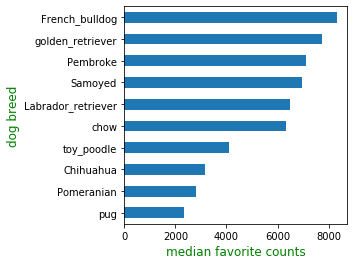

In [51]:
#visualization; sorted by highest to lowest
%matplotlib inline
plt.figure(figsize=(4,4))
top10_fav_counts_median.sort_values().plot.barh()
plt.xlabel("median favorite counts", fontsize=12, color='g')
plt.ylabel("dog breed", fontsize=12, color='g');

### 2. What are the most popular dog breeds (in terms of retweets)?

In [52]:
top10_rt_counts_median = df_top10.groupby("prediction1").retweet_count.median().sort_values(ascending=False)
top10_rt_counts_median

prediction1
French_bulldog        2443
Pembroke              2362
Samoyed               2218
golden_retriever      2096
chow                  2027
Labrador_retriever    1799
toy_poodle            1053
Chihuahua              986
Pomeranian             981
pug                    813
Name: retweet_count, dtype: int64

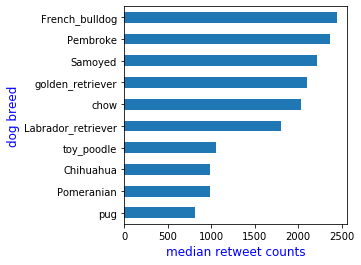

In [53]:
#visualization; sorted by highest to lowest
%matplotlib inline
plt.figure(figsize=(4,4))
top10_rt_counts_median.sort_values().plot.barh()
plt.xlabel("median retweet counts", fontsize=12, color='b')
plt.ylabel("dog breed", fontsize=12, color='b');

#### Was there a correlation between likes and retweets?

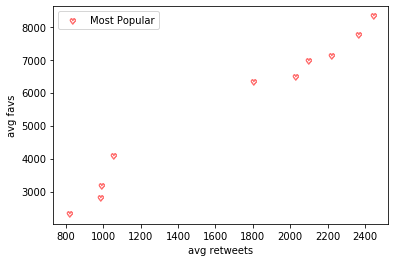

In [54]:
plt.scatter(top10_rt_counts_median, top10_fav_counts_median, c="red", alpha=0.5, marker=r'$\heartsuit$',
            label="Most Popular")
plt.xlabel("avg retweets")
plt.ylabel("avg favs")
plt.legend(loc='upper left')
plt.show()

In [55]:
np.corrcoef(top10_rt_counts_median, top10_fav_counts_median)

array([[1.        , 0.98899647],
       [0.98899647, 1.        ]])

Yes, there was a strong positive correlation between favs and retweets.
the more favs, the more retweets

### 3. Which breeds are the most highly rated on average?
Visualizing dog breeds with the highest rating on average.

In [56]:
df_top10["rating"] = df_top10["rating_numerator"]/df_top10["rating_denominator"]
top10_ratings_mean = df_top10.groupby(df_top10.prediction1).rating.mean().sort_values(ascending=False)
top10_ratings_mean

C:\Users\jamie.danmai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


prediction1
Samoyed               1.179310
chow                  1.173077
Pembroke              1.165714
golden_retriever      1.155810
toy_poodle            1.120833
French_bulldog        1.119048
Pomeranian            1.117241
Labrador_retriever    1.112698
Chihuahua             1.059574
pug                   1.020930
Name: rating, dtype: float64

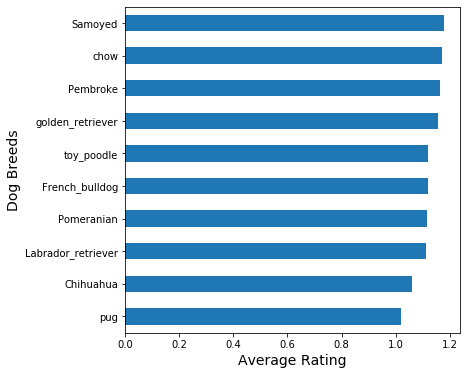

In [57]:
plt.figure(figsize=(6,6))
top10_ratings_mean.sort_values().plot.barh()
plt.xlabel("Average Rating", fontsize=14)
plt.ylabel("Dog Breeds", fontsize=14);

No handles with labels found to put in legend.


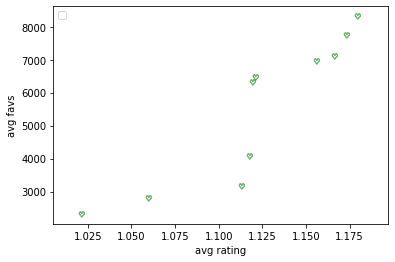

In [58]:
plt.scatter(top10_ratings_mean, top10_fav_counts_median, c="g", alpha=0.5, marker=r'$\heartsuit$')
plt.xlabel("avg rating")
plt.ylabel("avg favs")
plt.legend(loc='upper left')
plt.show()

In [59]:
np.corrcoef(top10_ratings_mean, top10_fav_counts_median)

array([[1.        , 0.89986836],
       [0.89986836, 1.        ]])

No handles with labels found to put in legend.


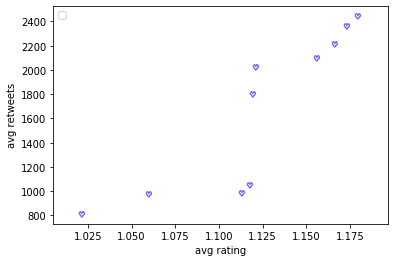

In [60]:
plt.scatter(top10_ratings_mean, top10_rt_counts_median, c="b", alpha=0.5, marker=r'$\heartsuit$')
plt.xlabel("avg rating")
plt.ylabel("avg retweets")
plt.legend(loc='upper left')
plt.show()

In [61]:
np.corrcoef(top10_ratings_mean, top10_rt_counts_median)

array([[1.        , 0.86761207],
       [0.86761207, 1.        ]])

The correlation between rating and favs was slightly stronger than the relationship between rating and retweets